# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt

data = pd.read_csv('DGdata.csv')
data.head()

,Unnamed: 0,Country/Territory,Region,C/T?,Edition,Status,PR Rating,CL Rating,Electoral Process,Pol Pluralism & Participation,Funding of Government,Add Q,PR,Freedom of Expression and Belief,Associational & Organization Rights,Rule of Law,Personal Autonomy and Ind. Rights,Civil Liberties,Total
0,0,Abkhazia,Eurasia,t,2021,PF,5,5,5,8,4,0,17,8,6,4,5,23,40
1,1,Afghanistan,Asia,c,2021,NF,5,6,3,7,3,0,13,6,4,2,2,14,27
2,2,Albania,Europe,c,2021,PF,3,3,8,12,7,0,27,13,8,9,9,39,66
3,3,Algeria,MENA,c,2021,NF,6,5,3,4,3,0,10,6,3,6,7,22,32
4,4,Andorra,Europe,c,2021,F,1,1,12,15,11,0,38,14,11,15,15,55,93


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

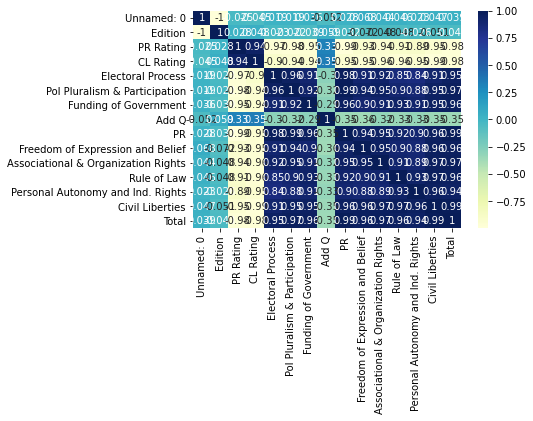

In [9]:
sb.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


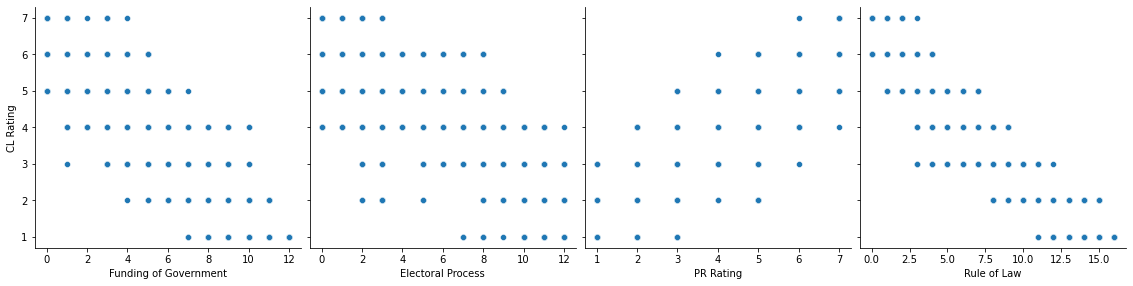

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sb

sb.pairplot(data, x_vars=['Funding of Government', 'Electoral Process', 'PR Rating', 'Rule of Law'], y_vars='CL Rating', size=4, aspect=1, kind='scatter')
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [10]:
x = data['PR Rating']

In [11]:
y = data['CL Rating']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
x_train

220     1
2752    5
2643    2
1756    6
672     7
       ..
1930    1
79      1
1859    6
2840    3
1544    2
Name: PR Rating, Length: 2337, dtype: int64

In [14]:
y_train

220     1
2752    5
2643    2
1756    6
672     6
       ..
1930    1
79      1
1859    6
2840    3
1544    3
Name: CL Rating, Length: 2337, dtype: int64

In [27]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const        0.463542
PR Rating    0.827807
dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [29]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

In [33]:
lr = sm.OLS(y_train, x_train_sm).fit()

lr.params

const        0.463542
PR Rating    0.827807
dtype: float64

In [34]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CL Rating   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.980e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:28:01   Log-Likelihood:                -2218.6
No. Observations:                2337   AIC:                             4441.
Df Residuals:                    2335   BIC:                             4453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4635      0.025     18.832      0.000       0.415       0.512
PR Rating      0.8278      0.006    140.714      0.000       0.816       0.839
==============================================================================
Omnibus:                       40.632   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.409
Skew:                          -0.010   Prob(JB):                     5.71e-18
Kurtosis:                       3.903   Cond. No.                         8.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Error Terms

Finally, plot your error terms!

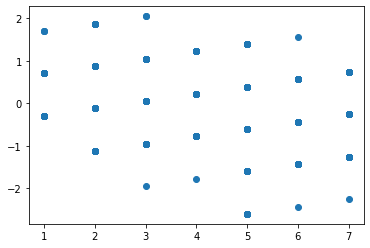

In [36]:
#no clear pattern - is this what multicollinearity looks like?
plt.scatter(x_train,res)
plt.show()

In [37]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

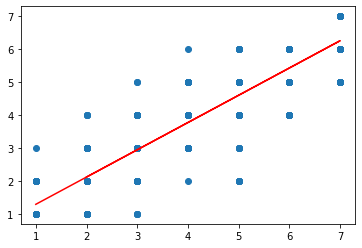

In [38]:
plt.scatter(x_test, y_test)
plt.plot(x_train, 0.463542+0.827807*x_train, 'r')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


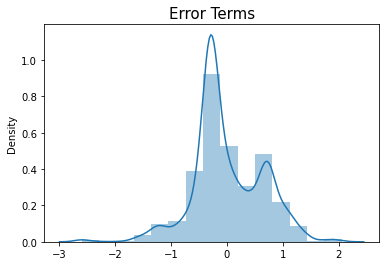

In [19]:
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.895
        2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? Yes, it seems to be the correct type of analysis given results obtained for the two variables observed.
3. Was your plot of the error terms a bell curve? It wasn't a perfect curve but was pretty similar